In [ ]:
import pandas as pd
import numpy as np

# CSV 읽기
df = pd.read_csv("dataset.csv")

# 1️⃣ heading 0~360 -> radian -> sin/cos
df['heading_rad'] = np.deg2rad(df['heading'])
df['sin_heading'] = np.sin(df['heading_rad'])
df['cos_heading'] = np.cos(df['heading_rad'])

# 2️⃣ delta 값 정규화
df['delta_encL'] = df['delta_encL'] / 100.0
df['delta_encR'] = df['delta_encR'] / 100.0

# 3️⃣ 강제로 3개 클래스 원-핫 라벨 (직진만 1, 좌/우 0)
df['label_forward'] = 1
df['label_left'] = 0
df['label_right'] = 0
label_cols = ['label_forward', 'label_left', 'label_right']  # 가장 앞

df['cmdL_scaled'] = df['cmdL'] / 12.70
df['cmdR_scaled'] = df['cmdR'] / 12.70



# 4️⃣ 윈도우 길이
window_size = 5


label_cols = ['label_forward', 'label_left', 'label_right']
feature_cols = ['delta_encL', 'delta_encR', 'sin_heading', 'cos_heading']

X, Y = [], []

for i in range(len(df) - window_size):
    window = []

    # 0~4번째 timestep을 순서대로 넣기
    for t in range(window_size):
        row = df.iloc[i + t]

        # [label..., feature...] 순서로 붙이기
        window.extend(row[label_cols].values.tolist())
        window.extend(row[feature_cols].values.tolist())

    X.append(window)

    # 출력: 다음 timestep의 cmdL, cmdR
    Y.append(df.iloc[i + window_size][['cmdL', 'cmdR']].values)

X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

print("입력 X shape:", X.shape)  # (샘플 수, window_size * (label+feature))
print("출력 Y shape:", Y.shape)  # (샘플 수, 2)

print("입력 5개:\n", X[:5])

입력 X shape: (7520, 35)
출력 Y shape: (7520, 2)
입력 5개:
 [[ 1.          0.          0.          0.          0.         -0.8228885
   0.56820285  1.          0.          0.         -0.02       -0.02
  -0.8228885   0.56820285  1.          0.          0.         -0.12
  -0.07       -0.8228885   0.56820285  1.          0.          0.
  -0.09       -0.07       -0.82474357  0.56550694  1.          0.
   0.         -0.09       -0.09       -0.82474357  0.56550694]
 [ 1.          0.          0.         -0.02       -0.02       -0.8228885
   0.56820285  1.          0.          0.         -0.12       -0.07
  -0.8228885   0.56820285  1.          0.          0.         -0.09
  -0.07       -0.82474357  0.56550694  1.          0.          0.
  -0.09       -0.09       -0.82474357  0.56550694  1.          0.
   0.         -0.12       -0.11       -0.82474357  0.56550694]
 [ 1.          0.          0.         -0.12       -0.07       -0.8228885
   0.56820285  1.          0.          0.         -0.09       -0.0

Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0543 - val_loss: 0.0155
Epoch 2/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0084
Epoch 3/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 4/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0739e-04 - val_loss: 0.0038
Epoch 5/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5671e-04 - val_loss: 0.0028
Epoch 6/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0739e-04 - val_loss: 0.0023
Epoch 7/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5803e-04 - val_loss: 0.0019
Epoch 8/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0081e-04 - val_loss: 0.0016
Epoch 9/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0292e-04 - val_loss: 0.0014
Epoch 10/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7262e-04 - val_loss: 0.0013
Epoch 11/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8212e-04 - val_loss: 0.0013
Epoch 12/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

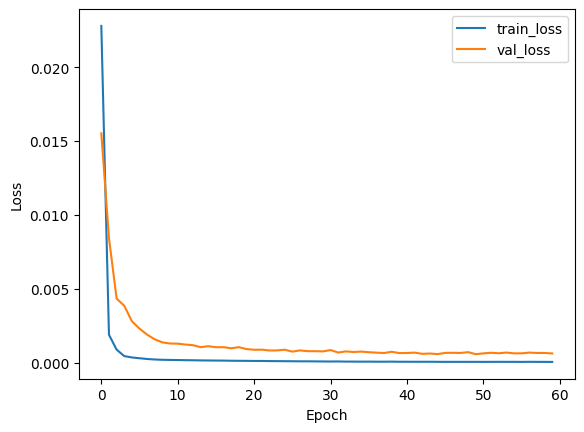

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
실제 Y:
 [[10. 11.]
 [10. 12.]
 [10. 12.]
 [10. 12.]
 [10. 13.]]
예측 Y:
 [[0.08109714 0.06242855]
 [0.08027182 0.07123695]
 [0.07691287 0.07098547]
 [0.07727917 0.0766827 ]
 [0.07625354 0.08302615]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# X, Y: 이전 단계에서 만든 numpy 배열
Y_norm = Y.astype(np.float32) / 127.0

# 1️⃣ 하드웨어 친화적 FFNN 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # 첫 레이어 64
    Dense(32, activation='relu'),                             # 두 번째 레이어 32
    Dense(16, activation='relu'),                             # 세 번째 레이어 16
    Dense(2, activation='sigmoid')                            # 출력: curr_cmdL/R (0~1 스케일)
])

# 2️⃣ 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 3️⃣ 모델 학습
history = model.fit(X, Y_norm, epochs=60, batch_size=64, validation_split=0.2)

# 4️⃣ 학습 결과 확인
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5️⃣ 예측 예시
Y_pred = model.predict(X[:5])
print("실제 Y:\n", Y[:5])
print("예측 Y:\n", Y_pred)

pred_scaled = (Y_pred * 127.0).astype(np.int32)

In [ ]:
Y_pred = model.predict(X[:10])
pred_scaled = (Y_pred * 127.0).astype(np.int32)
print("실제 Y:", Y[:10],"예측 Y:\n", pred_scaled)



Y_pred = model.predict(X[3045:3050])
pred_scaled = (Y_pred * 127.0).astype(np.int32)
print("실제 Y:", Y[3045:3050],"예측 Y:\n", pred_scaled)

Y_pred = model.predict(X[1045:1050])
pred_scaled = (Y_pred * 127.0).astype(np.int32)
print("실제 Y:", Y[1045:1050],"예측 Y:\n", pred_scaled)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
실제 Y: [[10. 11.]
 [10. 12.]
 [10. 12.]
 [10. 12.]
 [10. 13.]
 [10. 13.]
 [10. 13.]
 [10. 13.]
 [10. 14.]
 [10. 14.]] 예측 Y:
 [[10  7]
 [10  9]
 [ 9  9]
 [ 9  9]
 [ 9 10]
 [ 9 10]
 [ 9 11]
 [ 9 11]
 [10 12]
 [10 12]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
실제 Y: [[15. 19.]
 [15. 18.]
 [15. 18.]
 [15. 18.]
 [15. 18.]] 예측 Y:
 [[15 20]
 [15 20]
 [15 20]
 [14 19]
 [15 18]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
실제 Y: [[10. 15.]
 [10. 15.]
 [10. 15.]
 [10. 15.]
 [10. 15.]] 예측 Y:
 [[10 14]
 [ 9 15]
 [10 15]
 [10 15]
 [10 15]]


In [ ]:
for layer in model.layers:
    w = layer.get_weights()
    if len(w) == 0:
        continue
    W, b = w
    print(f"\n=== Layer: {layer.name} ===")
    print("Weights shape:", W.shape)
    print(W)
    print("Bias shape:", b.shape)
    print(b)


=== Layer: dense_4 ===
Weights shape: (45, 64)
[[-0.10787672 -0.2786264  -0.14356989 ... -0.015927   -0.26805684
  -0.45429787]
 [-0.03196019 -0.03885967 -0.12514511 ... -0.17912892  0.00767232
  -0.05147849]
 [ 0.23127703  0.1738434   0.08581991 ...  0.16579635 -0.15918969
  -0.21742642]
 ...
 [ 0.19225995 -0.02354391 -0.04933894 ... -0.12288414  0.031502
  -0.05102536]
 [-0.13364267 -0.13807884 -0.00654826 ... -0.12906325 -0.03634628
   0.24493054]
 [ 0.02480339  0.10998504  0.05559157 ... -0.10362929 -0.14403975
   0.2108654 ]]
Bias shape: (64,)
[ 0.         -0.10100429  0.          0.         -0.0513718   0.00248823
  0.          0.          0.11475688  0.         -0.00123562  0.
  0.          0.13591523  0.          0.         -0.04008194 -0.01112807
  0.00327581 -0.00992209  0.00443634  0.07537583  0.          0.
  0.          0.03174593 -0.07007457  0.0134647   0.         -0.07149243
 -0.01297137 -0.10756369  0.05596771  0.         -0.01029477  0.15121543
  0.1469406   0.047272

In [ ]:
layer_id = 1

for layer in model.layers:
    weights = layer.get_weights()

    # Dense 레이어만 처리 (weight가 없는 레이어는 skip)
    if len(weights) == 0:
        continue

    W, b = weights
    in_dim, out_dim = W.shape

    # ---- Weight 출력 ----
    print(f"// Layer {layer_id} Weights ({in_dim} x {out_dim})")
    print(f"const fixed16_2 W{layer_id}[{in_dim}][{out_dim}] = {{")
    for i in range(in_dim):
        row = ", ".join(f"{W[i][j]:.8f}" for j in range(out_dim))
        print(f"    {{ {row} }},")
    print("};\n")

    # ---- Bias 출력 ----
    print(f"// Layer {layer_id} Bias ({out_dim})")
    bias_line = ", ".join(f"{b[j]:.8f}" for j in range(out_dim))
    print(f"const fixed16_2 b{layer_id}[{out_dim}] = {{ {bias_line} }};\n")

    layer_id += 1

// Layer 1 Weights (35 x 64)
const fixed16_2 W1[35][64] = {
    { 0.25309536, 0.29470450, -0.04932202, 0.22883037, -0.12960674, 0.07797430, 0.01682367, -0.21640252, -0.14428404, 0.11497249, -0.03845580, -0.13680090, -0.04551084, -0.08673993, -0.04555294, 0.12348835, -0.20181550, -0.15310633, 0.16105835, 0.15004139, -0.02472849, -0.16650544, 0.24543214, 0.09276251, 0.10387499, -0.11011624, -0.03233397, 0.18455453, -0.03881254, 0.20765547, -0.17029668, 0.22311208, 0.03293590, -0.10861336, 0.02393948, -0.12203377, -0.15811002, 0.25845027, 0.18356609, -0.11359183, -0.00460931, -0.23184109, 0.09884063, 0.21444230, 0.21034874, -0.07474905, 0.23443660, 0.17202042, 0.09764773, -0.21238449, 0.11493018, 0.26192376, -0.07802655, -0.15265745, 0.03880085, -0.03875618, -0.15214986, 0.09006593, -0.00990433, -0.10441235, 0.24074706, -0.20621412, -0.16419405, -0.11812788 },
    { -0.04358296, -0.10408154, 0.01438770, -0.00522171, -0.12086016, 0.08986929, 0.17091948, 0.08682305, 0.02835658, -0.24467447,

In [ ]:
import numpy as np
import tensorflow as tf

# ---- Functional API로 layer-by-layer 모델 재구성 ----
inputs = tf.keras.Input(shape=(X.shape[1],))
x = inputs
outs = []

for layer in model.layers:
    x = layer(x)
    outs.append(x)

# 여러 레이어 출력 받는 모델
intermediate_model = tf.keras.Model(inputs=inputs, outputs=outs)

# ---- 테스트 샘플 1개 입력 ----
sample = X[1:2]  # 또는 아무 입력 1개

layer_outputs = intermediate_model.predict(sample)

# ---- 레이어별 출력 확인 ----
for i, out in enumerate(layer_outputs):
    print(f"\n===== Layer {i} ({model.layers[i].name}) Output =====")
    print(out)
    print("shape:", out.shape)

# ---- 마지막 레이어 pre-activation(z) 계산 ----
last_layer = model.layers[-1]          # 마지막 Dense
W, b = last_layer.get_weights()        # W: (in, out), b: (out,)

# 이전 레이어 출력 (activation 전)
prev_out = layer_outputs[-2]           # 마지막 레이어 직전 출력

# pre-activation 계산: z = Wx + b
z = np.dot(prev_out, W) + b
print("\n===== Last Layer Pre-activation (z) =====")
print(z)
print("shape:", z.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

===== Layer 0 (dense_4) Output =====
[[0.         2.5328543  0.         0.         1.128643   1.9187961
  0.         0.         1.2917559  0.         0.         0.
  0.         1.2570215  0.         0.         0.1305256  0.
  3.8869362  0.         0.         6.9010863  0.         0.
  0.         1.6089165  3.2410564  7.3745284  0.         4.7455263
  0.         2.0114002  4.7570996  0.         0.         7.8684964
  0.10156737 5.5477324  3.264685   3.101496   1.3810518  1.5460788
  1.2968465  0.         0.95813864 0.         2.7585952  0.
  3.3822293  2.296654   5.7806773  0.         0.         3.1622562
  4.2290406  0.         0.         2.0269356  4.685472   0.
  3.076241   0.         2.1357634  0.24813819]]
shape: (1, 64)

===== Layer 1 (dense_5) Output =====
[[0.        1.6598318 0.        2.9688056 0.        0.        0.
  1.2721673 1.7669582 0.        0.        0.        0.        0.
  0.        1.1366079 0.        3.3596625 0.        1.0463

9.945128700000001 11.3171351
10.239679800000001 11.976011100000001


In [ ]:
model.save("my_model.keras")
